In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.dates as md
import matplotlib.pyplot as plt
import sklearn

%matplotlib notebook

In [0]:
# read targets
airglow = pd.read_csv('labels_airglow_prediction.csv').set_index('utc557')
airglow

,i557,i630,iOH
utc557,,,
1975-01-14 19:00:00,146.4,42.4,640.4
1975-01-14 20:00:00,143.0,17.5,685.5
1975-01-14 21:00:00,130.0,35.6,695.0
1975-01-14 22:00:00,100.4,54.4,622.4
1975-01-14 23:00:00,88.6,80.4,691.9
1975-01-15 00:00:00,55.7,161.5,828.0
1975-01-15 01:00:00,0.0,139.8,725.5
1975-01-17 18:00:00,95.0,45.0,496.0
1975-01-17 19:00:00,112.2,38.8,506.0


In [0]:
# read features
feats = pd.read_csv('feautures_airglow_prediction.csv').set_index('date')
feats

,Kp,R,Dst,F107,AU,SA,O,N2,O2,density,temperature,H,apd
date,,,,,,,,,,,,,
1975-01-01 00:00:00,23,43,-7,78.0,0.983296,-49.886879,5.320000e+11,8.782000e+12,2.111000e+12,5.405000e-10,176.300000,2.689000e+07,7.400000
1975-01-01 01:00:00,23,43,-9,78.0,0.983296,-38.933297,5.326708e+11,8.792583e+12,2.113333e+12,5.411375e-10,176.254167,2.693667e+07,7.237500
1975-01-01 02:00:00,23,43,-10,78.0,0.983295,-27.852304,5.333417e+11,8.803167e+12,2.115667e+12,5.417750e-10,176.208333,2.698333e+07,7.075000
1975-01-01 03:00:00,30,43,-11,78.0,0.983295,-16.982871,5.340125e+11,8.813750e+12,2.118000e+12,5.424125e-10,176.162500,2.703000e+07,6.912500
1975-01-01 04:00:00,30,43,-12,78.0,0.983295,-6.604378,5.346833e+11,8.824333e+12,2.120333e+12,5.430500e-10,176.116667,2.707667e+07,6.750000
1975-01-01 05:00:00,30,43,-9,78.0,0.983294,2.978829,5.353542e+11,8.834917e+12,2.122667e+12,5.436875e-10,176.070833,2.712333e+07,6.587500
1975-01-01 06:00:00,20,43,-8,78.0,0.983294,11.389825,5.360250e+11,8.845500e+12,2.125000e+12,5.443250e-10,176.025000,2.717000e+07,6.425000
1975-01-01 07:00:00,20,43,-7,78.0,0.983294,18.157237,5.366958e+11,8.856083e+12,2.127333e+12,5.449625e-10,175.979167,2.721667e+07,6.262500
1975-01-01 08:00:00,20,43,-14,78.0,0.983293,22.744397,5.373667e+11,8.866667e+12,2.129667e+12,5.456000e-10,175.933333,2.726333e+07,6.100000


In [0]:
# join tables together based on date (inner join)
df = feats.merge(airglow, left_index=True, right_index=True, how='inner')
df

,Kp,R,Dst,F107,AU,SA,O,N2,O2,density,temperature,H,apd,i557,i630,iOH
1975-01-14 19:00:00,47,19,-44,77.7,0.983643,-54.778633,4.945875e+11,8.453375e+12,2.066250e+12,5.216125e-10,177.995833,2.500500e+07,19.087500,146.4,42.4,640.4
1975-01-14 20:00:00,47,19,-45,77.7,0.983645,-63.744810,4.956500e+11,8.470500e+12,2.070000e+12,5.226500e-10,177.916667,2.509000e+07,18.350000,143.0,17.5,685.5
1975-01-14 21:00:00,40,19,-47,77.7,0.983647,-68.795810,4.967125e+11,8.487625e+12,2.073750e+12,5.236875e-10,177.837500,2.517500e+07,17.612500,130.0,35.6,695.0
1975-01-14 22:00:00,40,19,-43,77.7,0.983650,-67.057793,4.977750e+11,8.504750e+12,2.077500e+12,5.247250e-10,177.758333,2.526000e+07,16.875000,100.4,54.4,622.4
1975-01-14 23:00:00,40,19,-39,77.7,0.983652,-59.700764,4.988375e+11,8.521875e+12,2.081250e+12,5.257625e-10,177.679167,2.534500e+07,16.137500,88.6,80.4,691.9
1975-01-15 00:00:00,33,29,-38,77.4,0.983654,-49.792742,4.999000e+11,8.539000e+12,2.085000e+12,5.268000e-10,177.600000,2.543000e+07,15.400000,55.7,161.5,828.0
1975-01-15 01:00:00,33,29,-33,77.4,0.983656,-38.947948,4.993917e+11,8.532417e+12,2.083625e+12,5.264042e-10,177.633333,2.539792e+07,15.650000,0.0,139.8,725.5
1975-01-17 18:00:00,37,24,-24,74.7,0.983819,-43.727168,4.822500e+11,8.346750e+12,2.046250e+12,5.151250e-10,178.650000,2.454250e+07,24.150000,95.0,45.0,496.0
1975-01-17 19:00:00,37,24,-25,74.7,0.983822,-54.211071,4.826083e+11,8.353292e+12,2.047708e+12,5.155208e-10,178.625000,2.457542e+07,23.858333,112.2,38.8,506.0
1975-01-17 20:00:00,37,24,-28,74.7,0.983825,-63.140120,4.829667e+11,8.359833e+12,2.049167e+12,5.159167e-10,178.600000,2.460833e+07,23.566667,101.5,39.1,488.0


### Task 1: Which feature has the greatest sigma / mean ratio?

In [0]:
# prechadzaj cez df.columns (mimo poslednych troch)
# pre kazdy column zrataj mean, std
# uloz si napr. do dictionary key-value pairs, column_name: (std / mean)
# pre ktory column je maximalny (std / mean)?

In [0]:
df.iloc[:, :-3].apply(lambda x: abs(x.std() / x.mean())).sort_values(ascending=False)

Dst            1.167588
apd            0.909893
R              0.766563
SA             0.653590
Kp             0.537573
F107           0.419975
O              0.264893
H              0.223192
O2             0.133919
density        0.098219
N2             0.093085
temperature    0.021562
AU             0.011132
dtype: float64

In [0]:
# calculate correlation matrix (just to see the potential)
df.corr().iloc[-3:, :-3]

,Kp,R,Dst,F107,AU,SA,O,N2,O2,density,temperature,H,apd
i557,0.038062,0.194877,-0.041159,0.180091,0.229464,-0.011835,-0.113421,-0.095428,-0.243995,-0.141218,0.341504,-0.268250,0.096849
i630,-0.026966,0.355636,0.006614,0.361106,0.045382,0.535173,-0.001646,-0.102735,-0.290333,-0.151702,0.031202,-0.346401,0.055267
iOH,0.015429,-0.062790,-0.013344,-0.047980,-0.242525,0.006318,0.161120,-0.093833,0.026773,-0.053272,-0.189110,0.087019,-0.010891


In [0]:
# separate features and labels
X = df.iloc[:, :-3].values
y1, y2, y3 = df.iloc[:, -3].values, df.iloc[:, -2].values, df.iloc[:, -1].values
print(X.shape)
print(y1.shape, y2.shape, y3.shape)

(3810, 13)
(3810,) (3810,) (3810,)


### Look for outliers

<IPython.core.display.Javascript object>


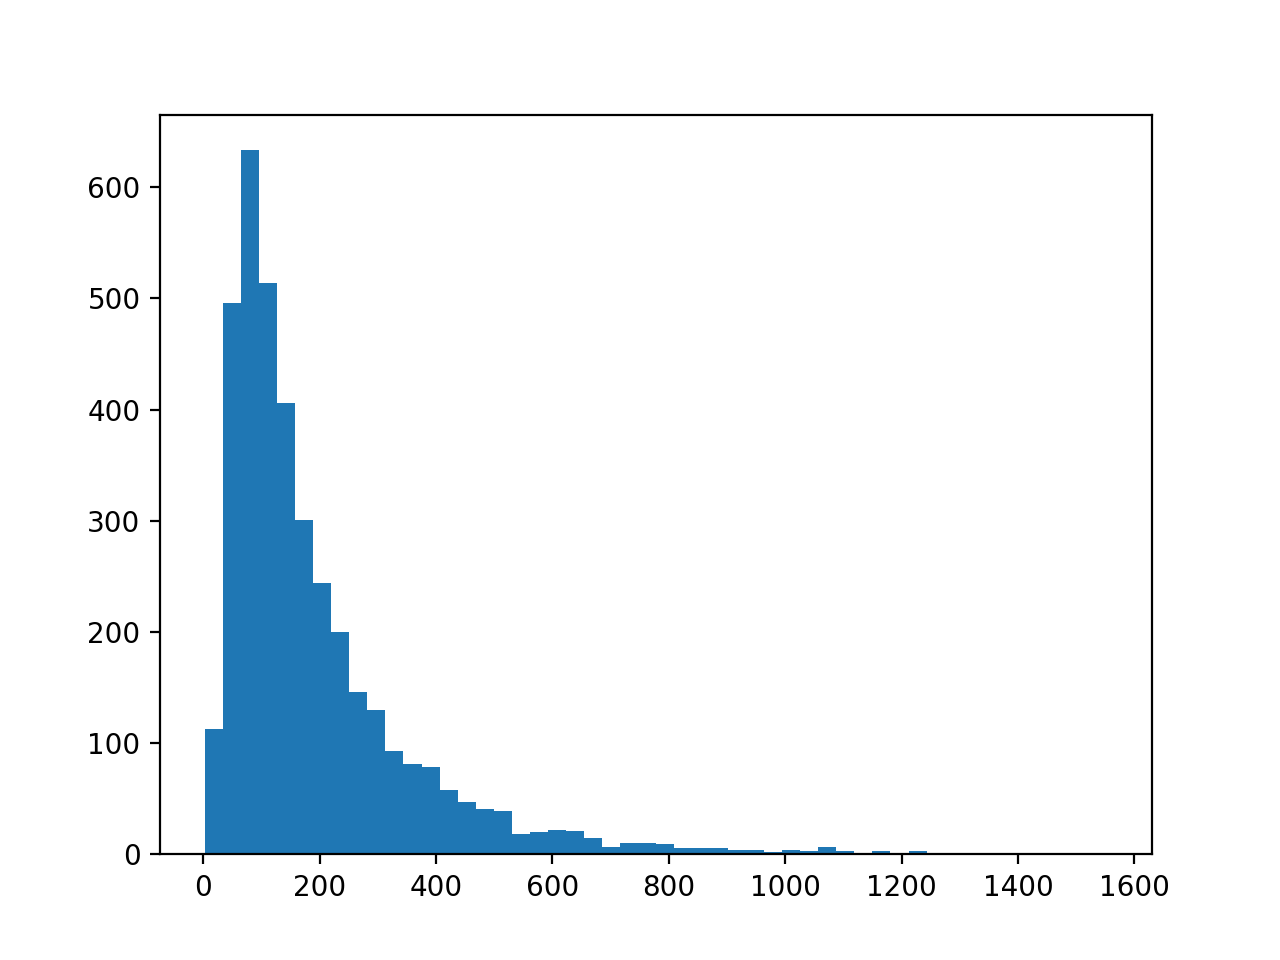

In [0]:
# requires domain knowledge to do it right, here are probably no outliers
plt.figure()
plt.hist(y2, bins=50)
plt.show()

### Useful functions

In [0]:
# train/test, feature scaling and linear regression - look at the code and make sure you understand it!
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def split_and_scale(X, y, poly_feats=False, poly_degree=2, random_state=42, shuffle=True):
    if poly_feats:
        poly_trans = PolynomialFeatures(degree=poly_degree, include_bias=False)
        X = poly_trans.fit_transform(X)
    print('Number of features: ', X.shape[1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=random_state, shuffle=shuffle)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)
    return X_train_sc, X_test_sc, y_train, y_test

def fit_eval_regression_model(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('Train score:', model.score(X_train, y_train), ' / ', mean_absolute_error(y_train, y_train_pred))
    print('Test score:', model.score(X_test, y_test), ' / ', mean_absolute_error(y_test, y_test_pred))
    print('Baseline MAE:', np.mean(np.abs(y_test - np.mean(y_train))) )

### Linear regression

In [0]:
from sklearn.linear_model import LinearRegression

for y in [y1, y2, y3]:
    X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=False, random_state=42, shuffle=True)    
    fit_eval_regression_model(X_train, X_test, y_train, y_test, LinearRegression())
    print('------------------------')

Number of features:  13
Train score: 0.24646934663308837  /  223.62041893296413
Test score: 0.2640870758027337  /  220.77635465989826
Baseline MAE: 261.35553247773163
------------------------
Number of features:  13
Train score: 0.5008243865498594  /  86.78069779391053
Test score: 0.504725409489044  /  81.14593159031632
Baseline MAE: 116.52725706284748
------------------------
Number of features:  13
Train score: 0.16154529630459236  /  153.9683198415488
Test score: 0.11977853450380704  /  162.632679297511
Baseline MAE: 174.11693783109789
------------------------


### Linear regression with polynomial features (degree 2)

In [0]:
for y in [y1, y2, y3]:
    X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=True, poly_degree=2, shuffle=True)
    fit_eval_regression_model(X_train, X_test, y_train, y_test, LinearRegression())
    print('------------------------')

Number of features:  104
Train score: 0.4112512811185709  /  200.74576041787128
Test score: 0.4085985824177186  /  200.38852938537832
Baseline MAE: 261.35553247773163
------------------------
Number of features:  104
Train score: 0.6734942343976336  /  68.72413160779183
Test score: 0.6350093068993643  /  67.21411459919254
Baseline MAE: 116.52725706284748
------------------------
Number of features:  104
Train score: 0.3028355295518572  /  140.820233738421
Test score: 0.20681204594768  /  154.15983576804405
Baseline MAE: 174.11693783109789
------------------------


### Linear regression with polynomial features (degree 3)

In [0]:
for y in [y1, y2, y3]:
    X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=True, poly_degree=3, shuffle=True)
    fit_eval_regression_model(X_train, X_test, y_train, y_test, LinearRegression())
    print('------------------------')

Number of features:  559
Train score: 0.7338122455043083  /  134.44950624387428
Test score: 0.6214291845434807  /  158.87491934596034
Baseline MAE: 261.35553247773163
------------------------
Number of features:  559
Train score: 0.8421594897909536  /  51.887661373973664
Test score: 0.6338278846630842  /  67.888786802111
Baseline MAE: 116.52725706284748
------------------------
Number of features:  559
Train score: 0.6354704514866951  /  101.50851702685135
Test score: 0.33930332502813243  /  130.1011804409227
Baseline MAE: 174.11693783109789
------------------------


### Add regularization

### Task 2: Add regularization (model called Ridge), do it for polynomial orders 1-5 and only for i630 line

In [0]:
# for loop over polynomial order
# instead of LinearRegression, use Ridge
# tune parameter alpha (regularization strength)

In [0]:
from sklearn.linear_model import Ridge, Lasso

for poly_degree in [1, 2, 3, 4]:
    print('POLYNOMIAL DEGREE:', poly_degree)
    print('------------------------')
#     for y in [y1, y2, y3]:
    for y in [y2]:
        X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=True, 
                                                           poly_degree=poly_degree, shuffle=True)
        fit_eval_regression_model(X_train, X_test, y_train, y_test, Ridge(alpha=1e-1))
        print('------------------------')

POLYNOMIAL DEGREE: 1
------------------------
Number of features:  13
Train score: 0.5008134243800123  /  86.79274177739777
Test score: 0.5045201316930725  /  81.16768473014912
Baseline MAE: 116.52725706284748
------------------------
POLYNOMIAL DEGREE: 2
------------------------
Number of features:  104
Train score: 0.6575209463414169  /  69.6008421816049
Test score: 0.6299385952056232  /  67.1635895073679
Baseline MAE: 116.52725706284748
------------------------
POLYNOMIAL DEGREE: 3
------------------------
Number of features:  559
Train score: 0.753400945770342  /  61.68494685227528
Test score: 0.6494734751519942  /  65.74358638678015
Baseline MAE: 116.52725706284748
------------------------
POLYNOMIAL DEGREE: 4
------------------------
Number of features:  2379
Train score: 0.8115076675086366  /  54.211602693328146
Test score: 0.6647210950239573  /  63.60478413352137
Baseline MAE: 116.52725706284748
------------------------


### Neural networks

In [0]:
# Time for gradient descent

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

model1 = Sequential([
    Dense(32, input_shape=(13,)),
    Activation('relu'),
    Dense(1)
])

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                448       
_________________________________________________________________
activation_15 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [0]:
X_train, X_test, y_train, y_test = split_and_scale(X, y2, poly_feats=False)

optimizer = Adam(lr=1e-2)
lr_scheduler = LearningRateScheduler(schedule=lambda epoch, lr: lr*0.9 if epoch % 100 == 0 else lr, verbose=1)

model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
history = model1.fit(X_train, y_train, epochs=10000, batch_size=64,
                     validation_data=(X_test, y_test),
                     callbacks=[lr_scheduler])

Number of features:  13


In [0]:
def plot_nn_results(history):
    plt.figure()
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.ylabel('mean_absolute_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.ylim(50, 80)
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.ylim(5000, 20000)
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
plot_nn_results(history)

In [0]:
model2 = Sequential([
    Dense(32, input_shape=(13,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    Dense(1)
])

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32)                128       
_________________________________________________________________
activation_16 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
batch_normalization_16 (Batc (None, 32)                128       
_________________________________________________________________
activation_17 (Activation)   (None, 32)                0         
__________

In [0]:
X_train, X_test, y_train, y_test = split_and_scale(X, y2, poly_feats=False)

optimizer = Adam(lr=1e-2)
lr_scheduler = LearningRateScheduler(schedule=lambda epoch, lr: lr*0.9 if epoch % 100 == 0 else lr, verbose=1)

model2.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
history = model2.fit(X_train, y_train, epochs=10000, batch_size=64,
                     validation_data=(X_test, y_test),
                     callbacks=[lr_scheduler])

Number of features:  13


In [0]:
plot_nn_results(history)

<IPython.core.display.Javascript object>


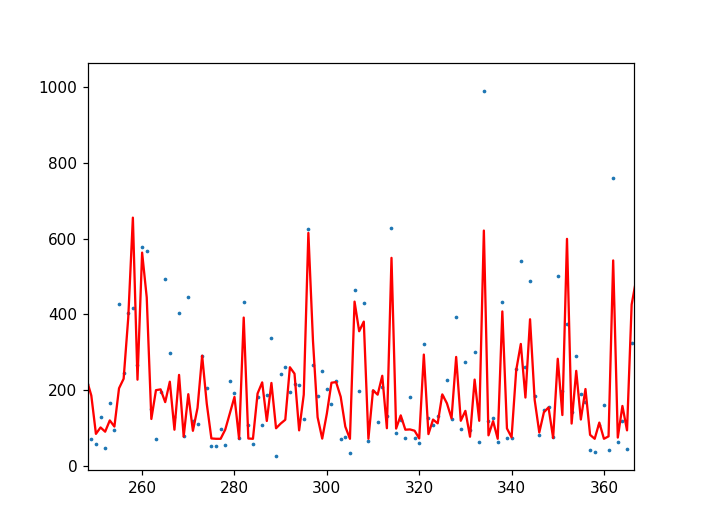

In [0]:
# look at predictions in test set
plt.figure()
plt.scatter(np.arange(len(y_test)), y_test, s=2)
plt.plot(model2.predict(X_test), color='r')
plt.show()

#### Pridame dake neurony

In [0]:
# tu ich nechaj ladit dropout rate, nech precitia
model3 = Sequential([
    Dense(64, input_shape=(13,)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),
    Dense(1)
])

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
activation_13 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_14 (Batc (None, 64)                256       
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
__________

In [0]:
X_train, X_test, y_train, y_test = split_and_scale(X, y2, poly_feats=False)

optimizer = Adam(lr=1e-2)
lr_scheduler = LearningRateScheduler(schedule=lambda epoch, lr: lr*0.9 if epoch % 100 == 0 else lr, verbose=1)

model3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
history = model3.fit(X_train, y_train, epochs=1000, batch_size=64,
                     validation_data=(X_test, y_test),
                     callbacks=[lr_scheduler])

Number of features:  13
Train on 3048 samples, validate on 762 samples
Epoch 1/1000

Epoch 00001: LearningRateScheduler setting learning rate to 0.008999999798834325.
3048/3048 [==============================] - 5s 1ms/step - loss: 63054.4726 - mean_absolute_error: 185.5877 - val_loss: 42211.1147 - val_mean_absolute_error: 159.8306
Epoch 2/1000

Epoch 00002: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 160us/step - loss: 43641.2981 - mean_absolute_error: 152.1741 - val_loss: 20661.0655 - val_mean_absolute_error: 108.5730
Epoch 3/1000

Epoch 00003: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 155us/step - loss: 21962.4672 - mean_absolute_error: 100.7455 - val_loss: 13204.3565 - val_mean_absolute_error: 84.9411
Epoch 4/1000

Epoch 00004: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================

Epoch 32/1000

Epoch 00032: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 149us/step - loss: 10374.8277 - mean_absolute_error: 67.6787 - val_loss: 9273.3707 - val_mean_absolute_error: 63.9946
Epoch 33/1000

Epoch 00033: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 147us/step - loss: 10648.8367 - mean_absolute_error: 69.2938 - val_loss: 8849.0369 - val_mean_absolute_error: 62.6130
Epoch 34/1000

Epoch 00034: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 147us/step - loss: 10668.8557 - mean_absolute_error: 68.0915 - val_loss: 8999.9836 - val_mean_absolute_error: 64.0218
Epoch 35/1000

Epoch 00035: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 147us/step - loss: 10645.6531 - mean_absolute_error: 68.9904 - val

3048/3048 [==============================] - 0s 147us/step - loss: 9915.0773 - mean_absolute_error: 67.3944 - val_loss: 8777.9815 - val_mean_absolute_error: 63.1004
Epoch 64/1000

Epoch 00064: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 147us/step - loss: 9694.9665 - mean_absolute_error: 65.3995 - val_loss: 8722.3645 - val_mean_absolute_error: 61.5787
Epoch 65/1000

Epoch 00065: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 148us/step - loss: 10057.9170 - mean_absolute_error: 66.3695 - val_loss: 8494.1233 - val_mean_absolute_error: 61.9182
Epoch 66/1000

Epoch 00066: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 147us/step - loss: 9509.3699 - mean_absolute_error: 66.7070 - val_loss: 8339.7385 - val_mean_absolute_error: 61.7548
Epoch 67/1000

Epoch 00067: LearningRateSchedule

3048/3048 [==============================] - 0s 151us/step - loss: 9365.7515 - mean_absolute_error: 66.1673 - val_loss: 8574.2738 - val_mean_absolute_error: 62.6458
Epoch 95/1000

Epoch 00095: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 146us/step - loss: 9881.0660 - mean_absolute_error: 67.4390 - val_loss: 8722.6045 - val_mean_absolute_error: 62.0048
Epoch 96/1000

Epoch 00096: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 146us/step - loss: 9641.6516 - mean_absolute_error: 66.3500 - val_loss: 8626.2935 - val_mean_absolute_error: 61.9018
Epoch 97/1000

Epoch 00097: LearningRateScheduler setting learning rate to 0.008999999612569809.
3048/3048 [==============================] - 0s 148us/step - loss: 9684.3402 - mean_absolute_error: 65.6937 - val_loss: 8490.6219 - val_mean_absolute_error: 61.4964
Epoch 98/1000

Epoch 00098: LearningRateScheduler

3048/3048 [==============================] - 0s 148us/step - loss: 8583.8903 - mean_absolute_error: 64.5462 - val_loss: 8568.6570 - val_mean_absolute_error: 61.1366
Epoch 126/1000

Epoch 00126: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 147us/step - loss: 8699.3569 - mean_absolute_error: 63.6667 - val_loss: 8567.7132 - val_mean_absolute_error: 60.9169
Epoch 127/1000

Epoch 00127: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 144us/step - loss: 9807.9159 - mean_absolute_error: 65.8738 - val_loss: 8224.2158 - val_mean_absolute_error: 59.9496
Epoch 128/1000

Epoch 00128: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 146us/step - loss: 9547.1181 - mean_absolute_error: 64.8469 - val_loss: 8288.2249 - val_mean_absolute_error: 59.2801
Epoch 129/1000

Epoch 00129: LearningRateSched

3048/3048 [==============================] - 0s 148us/step - loss: 8496.0497 - mean_absolute_error: 62.8029 - val_loss: 8656.3064 - val_mean_absolute_error: 61.1769
Epoch 157/1000

Epoch 00157: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 145us/step - loss: 9110.8231 - mean_absolute_error: 64.5162 - val_loss: 8316.3510 - val_mean_absolute_error: 60.3556
Epoch 158/1000

Epoch 00158: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 145us/step - loss: 8340.0670 - mean_absolute_error: 63.3422 - val_loss: 8584.8833 - val_mean_absolute_error: 60.3441
Epoch 159/1000

Epoch 00159: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 147us/step - loss: 8952.0887 - mean_absolute_error: 63.8682 - val_loss: 8494.1629 - val_mean_absolute_error: 60.4245
Epoch 160/1000

Epoch 00160: LearningRateSched

3048/3048 [==============================] - 0s 147us/step - loss: 8500.8301 - mean_absolute_error: 62.6019 - val_loss: 8019.9489 - val_mean_absolute_error: 60.2988
Epoch 188/1000

Epoch 00188: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 146us/step - loss: 9623.1615 - mean_absolute_error: 65.2147 - val_loss: 8592.4158 - val_mean_absolute_error: 61.9016
Epoch 189/1000

Epoch 00189: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 146us/step - loss: 8875.9171 - mean_absolute_error: 64.9077 - val_loss: 8236.9502 - val_mean_absolute_error: 59.0290
Epoch 190/1000

Epoch 00190: LearningRateScheduler setting learning rate to 0.008099999278783798.
3048/3048 [==============================] - 0s 146us/step - loss: 8882.0413 - mean_absolute_error: 63.5142 - val_loss: 8397.4151 - val_mean_absolute_error: 60.2504
Epoch 191/1000

Epoch 00191: LearningRateSched

3048/3048 [==============================] - 0s 148us/step - loss: 8448.1144 - mean_absolute_error: 62.6296 - val_loss: 8380.2756 - val_mean_absolute_error: 60.0384
Epoch 219/1000

Epoch 00219: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 146us/step - loss: 8321.2518 - mean_absolute_error: 61.8732 - val_loss: 7986.7008 - val_mean_absolute_error: 59.4863
Epoch 220/1000

Epoch 00220: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 144us/step - loss: 8265.1142 - mean_absolute_error: 63.1707 - val_loss: 8225.5424 - val_mean_absolute_error: 59.6042
Epoch 221/1000

Epoch 00221: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 146us/step - loss: 8305.6413 - mean_absolute_error: 62.4632 - val_loss: 8235.8983 - val_mean_absolute_error: 59.9867
Epoch 222/1000

Epoch 00222: LearningRateSc

3048/3048 [==============================] - 0s 150us/step - loss: 8081.5873 - mean_absolute_error: 61.5444 - val_loss: 8148.9257 - val_mean_absolute_error: 59.2658
Epoch 250/1000

Epoch 00250: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 148us/step - loss: 7944.3200 - mean_absolute_error: 60.7841 - val_loss: 8673.7552 - val_mean_absolute_error: 61.2395
Epoch 251/1000

Epoch 00251: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 149us/step - loss: 8385.3598 - mean_absolute_error: 62.3944 - val_loss: 8255.5122 - val_mean_absolute_error: 60.1325
Epoch 252/1000

Epoch 00252: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 146us/step - loss: 8388.6747 - mean_absolute_error: 63.6466 - val_loss: 8170.6246 - val_mean_absolute_error: 59.3165
Epoch 253/1000

Epoch 00253: LearningRateSc

3048/3048 [==============================] - 0s 149us/step - loss: 7944.7212 - mean_absolute_error: 61.1836 - val_loss: 8107.8137 - val_mean_absolute_error: 59.2473
Epoch 281/1000

Epoch 00281: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 148us/step - loss: 7848.6785 - mean_absolute_error: 61.5092 - val_loss: 8109.3209 - val_mean_absolute_error: 59.2123
Epoch 282/1000

Epoch 00282: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 148us/step - loss: 8561.7893 - mean_absolute_error: 63.0311 - val_loss: 8017.2017 - val_mean_absolute_error: 58.7562
Epoch 283/1000

Epoch 00283: LearningRateScheduler setting learning rate to 0.0072899991646409035.
3048/3048 [==============================] - 0s 148us/step - loss: 7844.1503 - mean_absolute_error: 61.0322 - val_loss: 8320.4457 - val_mean_absolute_error: 59.8142
Epoch 284/1000

Epoch 00284: LearningRateSc

3048/3048 [==============================] - 0s 147us/step - loss: 7979.6112 - mean_absolute_error: 61.3876 - val_loss: 8252.8641 - val_mean_absolute_error: 59.0824
Epoch 312/1000

Epoch 00312: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 146us/step - loss: 8458.0164 - mean_absolute_error: 62.6317 - val_loss: 8076.9958 - val_mean_absolute_error: 58.1292
Epoch 313/1000

Epoch 00313: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 147us/step - loss: 8630.2078 - mean_absolute_error: 63.2943 - val_loss: 7888.7193 - val_mean_absolute_error: 58.2653
Epoch 314/1000

Epoch 00314: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 146us/step - loss: 7972.5534 - mean_absolute_error: 61.4802 - val_loss: 8058.1082 - val_mean_absolute_error: 58.6552
Epoch 315/1000

Epoch 00315: LearningRateSched

3048/3048 [==============================] - 0s 147us/step - loss: 8018.2887 - mean_absolute_error: 60.9549 - val_loss: 8325.6843 - val_mean_absolute_error: 59.4909
Epoch 343/1000

Epoch 00343: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 146us/step - loss: 7994.3234 - mean_absolute_error: 61.5154 - val_loss: 8094.2619 - val_mean_absolute_error: 59.3781
Epoch 344/1000

Epoch 00344: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 147us/step - loss: 7997.5821 - mean_absolute_error: 61.6173 - val_loss: 8209.5774 - val_mean_absolute_error: 59.4510
Epoch 345/1000

Epoch 00345: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 151us/step - loss: 7798.0590 - mean_absolute_error: 60.9515 - val_loss: 7793.1898 - val_mean_absolute_error: 57.8991
Epoch 346/1000

Epoch 00346: LearningRateSched

3048/3048 [==============================] - 0s 149us/step - loss: 8364.0184 - mean_absolute_error: 63.1034 - val_loss: 8052.1696 - val_mean_absolute_error: 57.9720
Epoch 374/1000

Epoch 00374: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 149us/step - loss: 7792.2309 - mean_absolute_error: 60.4070 - val_loss: 8057.8524 - val_mean_absolute_error: 58.3900
Epoch 375/1000

Epoch 00375: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 145us/step - loss: 8428.1357 - mean_absolute_error: 61.8750 - val_loss: 8258.9978 - val_mean_absolute_error: 59.4768
Epoch 376/1000

Epoch 00376: LearningRateScheduler setting learning rate to 0.006560999434441328.
3048/3048 [==============================] - 0s 146us/step - loss: 7831.7077 - mean_absolute_error: 62.0111 - val_loss: 8079.7079 - val_mean_absolute_error: 58.9419
Epoch 377/1000

Epoch 00377: LearningRateSched

3048/3048 [==============================] - 0s 154us/step - loss: 8318.9940 - mean_absolute_error: 61.5340 - val_loss: 8320.7077 - val_mean_absolute_error: 59.2111
Epoch 405/1000

Epoch 00405: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 147us/step - loss: 8238.7678 - mean_absolute_error: 61.8161 - val_loss: 8102.1623 - val_mean_absolute_error: 58.8774
Epoch 406/1000

Epoch 00406: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 145us/step - loss: 7664.9972 - mean_absolute_error: 59.6145 - val_loss: 8007.5687 - val_mean_absolute_error: 58.9663
Epoch 407/1000

Epoch 00407: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 146us/step - loss: 8016.4306 - mean_absolute_error: 61.5314 - val_loss: 7990.0111 - val_mean_absolute_error: 58.5896
Epoch 408/1000

Epoch 00408: LearningRateSc

3048/3048 [==============================] - 0s 143us/step - loss: 7725.4567 - mean_absolute_error: 60.4929 - val_loss: 7969.8095 - val_mean_absolute_error: 58.4262
Epoch 436/1000

Epoch 00436: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 146us/step - loss: 8045.0835 - mean_absolute_error: 61.6167 - val_loss: 8135.9869 - val_mean_absolute_error: 59.1794
Epoch 437/1000

Epoch 00437: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 146us/step - loss: 8176.0527 - mean_absolute_error: 62.0291 - val_loss: 8229.0882 - val_mean_absolute_error: 58.7201
Epoch 438/1000

Epoch 00438: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 144us/step - loss: 8413.9770 - mean_absolute_error: 62.0814 - val_loss: 8124.9152 - val_mean_absolute_error: 58.4577
Epoch 439/1000

Epoch 00439: LearningRateSc

3048/3048 [==============================] - 0s 156us/step - loss: 7862.6237 - mean_absolute_error: 61.1904 - val_loss: 8209.9855 - val_mean_absolute_error: 59.0134
Epoch 467/1000

Epoch 00467: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 155us/step - loss: 7922.3539 - mean_absolute_error: 60.8340 - val_loss: 8130.7269 - val_mean_absolute_error: 59.0430
Epoch 468/1000

Epoch 00468: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 151us/step - loss: 7731.1391 - mean_absolute_error: 60.4873 - val_loss: 7756.4078 - val_mean_absolute_error: 57.6039
Epoch 469/1000

Epoch 00469: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 160us/step - loss: 7884.2558 - mean_absolute_error: 61.6361 - val_loss: 8139.4970 - val_mean_absolute_error: 59.0485
Epoch 470/1000

Epoch 00470: LearningRateSc

3048/3048 [==============================] - 0s 158us/step - loss: 7331.9370 - mean_absolute_error: 59.9435 - val_loss: 8143.4806 - val_mean_absolute_error: 58.4719
Epoch 498/1000

Epoch 00498: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 156us/step - loss: 7626.9530 - mean_absolute_error: 60.4245 - val_loss: 7951.5418 - val_mean_absolute_error: 58.7444
Epoch 499/1000

Epoch 00499: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 158us/step - loss: 7956.8806 - mean_absolute_error: 61.9501 - val_loss: 8123.9848 - val_mean_absolute_error: 58.9216
Epoch 500/1000

Epoch 00500: LearningRateScheduler setting learning rate to 0.0059048994444310665.
3048/3048 [==============================] - 0s 156us/step - loss: 7715.6240 - mean_absolute_error: 60.2514 - val_loss: 8246.9502 - val_mean_absolute_error: 58.7700
Epoch 501/1000

Epoch 00501: LearningRateSc

3048/3048 [==============================] - 0s 159us/step - loss: 7566.2207 - mean_absolute_error: 60.5396 - val_loss: 7913.7732 - val_mean_absolute_error: 58.2871
Epoch 529/1000

Epoch 00529: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 0s 163us/step - loss: 7765.3798 - mean_absolute_error: 60.6935 - val_loss: 8406.6011 - val_mean_absolute_error: 59.4128
Epoch 530/1000

Epoch 00530: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 1s 171us/step - loss: 7602.2223 - mean_absolute_error: 60.1351 - val_loss: 7955.8037 - val_mean_absolute_error: 58.7959
Epoch 531/1000

Epoch 00531: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 1s 169us/step - loss: 7848.7676 - mean_absolute_error: 60.6752 - val_loss: 8068.9642 - val_mean_absolute_error: 60.0087
Epoch 532/1000

Epoch 00532: LearningRateSc

3048/3048 [==============================] - 1s 165us/step - loss: 7810.8347 - mean_absolute_error: 61.3340 - val_loss: 8113.7414 - val_mean_absolute_error: 58.3021
Epoch 560/1000

Epoch 00560: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 0s 164us/step - loss: 7320.3651 - mean_absolute_error: 58.7533 - val_loss: 7960.0410 - val_mean_absolute_error: 58.2840
Epoch 561/1000

Epoch 00561: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 1s 165us/step - loss: 7642.7933 - mean_absolute_error: 59.7299 - val_loss: 7759.0410 - val_mean_absolute_error: 58.1371
Epoch 562/1000

Epoch 00562: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 1s 172us/step - loss: 7687.4609 - mean_absolute_error: 60.2477 - val_loss: 7846.4160 - val_mean_absolute_error: 58.2026
Epoch 563/1000

Epoch 00563: LearningRateSc

3048/3048 [==============================] - 0s 159us/step - loss: 7859.3943 - mean_absolute_error: 61.4872 - val_loss: 8126.5031 - val_mean_absolute_error: 58.6351
Epoch 591/1000

Epoch 00591: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 0s 155us/step - loss: 7790.9693 - mean_absolute_error: 59.8097 - val_loss: 7833.3689 - val_mean_absolute_error: 57.8765
Epoch 592/1000

Epoch 00592: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 0s 155us/step - loss: 7769.7558 - mean_absolute_error: 59.9885 - val_loss: 7890.8150 - val_mean_absolute_error: 58.8703
Epoch 593/1000

Epoch 00593: LearningRateScheduler setting learning rate to 0.0053144097328186035.
3048/3048 [==============================] - 0s 152us/step - loss: 7700.0238 - mean_absolute_error: 60.3980 - val_loss: 7870.8282 - val_mean_absolute_error: 59.2751
Epoch 594/1000

Epoch 00594: LearningRateSc

3048/3048 [==============================] - 0s 164us/step - loss: 7709.8193 - mean_absolute_error: 60.1747 - val_loss: 8073.8353 - val_mean_absolute_error: 58.6178
Epoch 622/1000

Epoch 00622: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 0s 156us/step - loss: 7622.2169 - mean_absolute_error: 59.9486 - val_loss: 8136.3675 - val_mean_absolute_error: 58.5250
Epoch 623/1000

Epoch 00623: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 0s 157us/step - loss: 7843.1401 - mean_absolute_error: 60.6148 - val_loss: 7996.6370 - val_mean_absolute_error: 58.5936
Epoch 624/1000

Epoch 00624: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 1s 165us/step - loss: 7293.3561 - mean_absolute_error: 59.5252 - val_loss: 7952.1050 - val_mean_absolute_error: 58.4027
Epoch 625/1000

Epoch 00625: LearningRateSched

3048/3048 [==============================] - 0s 164us/step - loss: 7941.6803 - mean_absolute_error: 60.3003 - val_loss: 7989.0329 - val_mean_absolute_error: 58.3965
Epoch 653/1000

Epoch 00653: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 0s 162us/step - loss: 7385.5707 - mean_absolute_error: 59.4932 - val_loss: 7972.0282 - val_mean_absolute_error: 58.8133
Epoch 654/1000

Epoch 00654: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 0s 163us/step - loss: 7412.1878 - mean_absolute_error: 59.4258 - val_loss: 8012.0435 - val_mean_absolute_error: 58.7221
Epoch 655/1000

Epoch 00655: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 1s 169us/step - loss: 7605.7874 - mean_absolute_error: 59.6362 - val_loss: 8062.3857 - val_mean_absolute_error: 58.7786
Epoch 656/1000

Epoch 00656: LearningRateSched

3048/3048 [==============================] - 0s 159us/step - loss: 7354.9478 - mean_absolute_error: 59.0429 - val_loss: 7901.9694 - val_mean_absolute_error: 58.3509
Epoch 684/1000

Epoch 00684: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 0s 158us/step - loss: 7445.0101 - mean_absolute_error: 59.6467 - val_loss: 8083.4260 - val_mean_absolute_error: 58.7627
Epoch 685/1000

Epoch 00685: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 1s 191us/step - loss: 7708.7445 - mean_absolute_error: 59.4829 - val_loss: 7877.0570 - val_mean_absolute_error: 58.4291
Epoch 686/1000

Epoch 00686: LearningRateScheduler setting learning rate to 0.004782968666404486.
3048/3048 [==============================] - 1s 165us/step - loss: 7885.1085 - mean_absolute_error: 60.3742 - val_loss: 7686.6008 - val_mean_absolute_error: 58.2963
Epoch 687/1000

Epoch 00687: LearningRateSched

3048/3048 [==============================] - 1s 187us/step - loss: 7206.6268 - mean_absolute_error: 58.2828 - val_loss: 8159.9197 - val_mean_absolute_error: 59.0097
Epoch 715/1000

Epoch 00715: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 186us/step - loss: 7424.0079 - mean_absolute_error: 58.9175 - val_loss: 7808.1389 - val_mean_absolute_error: 58.3775
Epoch 716/1000

Epoch 00716: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 187us/step - loss: 8075.0778 - mean_absolute_error: 61.1318 - val_loss: 7827.7311 - val_mean_absolute_error: 58.5495
Epoch 717/1000

Epoch 00717: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 189us/step - loss: 7760.4418 - mean_absolute_error: 60.5770 - val_loss: 8042.9205 - val_mean_absolute_error: 58.5313
Epoch 718/1000

Epoch 00718: LearningRateSched

3048/3048 [==============================] - 1s 193us/step - loss: 7771.1365 - mean_absolute_error: 60.1598 - val_loss: 7949.6276 - val_mean_absolute_error: 58.4482
Epoch 746/1000

Epoch 00746: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 185us/step - loss: 7475.0069 - mean_absolute_error: 58.7426 - val_loss: 8321.2232 - val_mean_absolute_error: 59.0859
Epoch 747/1000

Epoch 00747: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 194us/step - loss: 7458.3173 - mean_absolute_error: 59.2147 - val_loss: 8138.4324 - val_mean_absolute_error: 58.7137
Epoch 748/1000

Epoch 00748: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 195us/step - loss: 6992.9590 - mean_absolute_error: 57.9960 - val_loss: 7850.5340 - val_mean_absolute_error: 58.5407
Epoch 749/1000

Epoch 00749: LearningRateSched

3048/3048 [==============================] - 1s 174us/step - loss: 8114.0969 - mean_absolute_error: 61.0459 - val_loss: 7862.4167 - val_mean_absolute_error: 57.9615
Epoch 777/1000

Epoch 00777: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 168us/step - loss: 7231.1579 - mean_absolute_error: 59.1267 - val_loss: 7719.1532 - val_mean_absolute_error: 57.8474
Epoch 778/1000

Epoch 00778: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 167us/step - loss: 7230.3174 - mean_absolute_error: 59.1999 - val_loss: 7875.5198 - val_mean_absolute_error: 57.9972
Epoch 779/1000

Epoch 00779: LearningRateScheduler setting learning rate to 0.004304671660065651.
3048/3048 [==============================] - 1s 167us/step - loss: 6876.2359 - mean_absolute_error: 57.6672 - val_loss: 8025.3152 - val_mean_absolute_error: 58.2044
Epoch 780/1000

Epoch 00780: LearningRateSched

3048/3048 [==============================] - 0s 161us/step - loss: 7165.9856 - mean_absolute_error: 58.3083 - val_loss: 7773.5379 - val_mean_absolute_error: 57.9625
Epoch 808/1000

Epoch 00808: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 160us/step - loss: 7079.7279 - mean_absolute_error: 57.9105 - val_loss: 7771.7507 - val_mean_absolute_error: 57.8093
Epoch 809/1000

Epoch 00809: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 160us/step - loss: 7096.5027 - mean_absolute_error: 58.0030 - val_loss: 7859.8759 - val_mean_absolute_error: 58.0304
Epoch 810/1000

Epoch 00810: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 1s 166us/step - loss: 7559.1431 - mean_absolute_error: 59.5587 - val_loss: 7853.6586 - val_mean_absolute_error: 57.8793
Epoch 811/1000

Epoch 00811: LearningRateSc

3048/3048 [==============================] - 0s 154us/step - loss: 7631.3190 - mean_absolute_error: 59.9793 - val_loss: 8124.3980 - val_mean_absolute_error: 58.5595
Epoch 839/1000

Epoch 00839: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 152us/step - loss: 7496.4757 - mean_absolute_error: 59.5243 - val_loss: 7851.9642 - val_mean_absolute_error: 58.0206
Epoch 840/1000

Epoch 00840: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 158us/step - loss: 7299.0132 - mean_absolute_error: 59.6336 - val_loss: 7941.6766 - val_mean_absolute_error: 58.1002
Epoch 841/1000

Epoch 00841: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 153us/step - loss: 6731.7515 - mean_absolute_error: 57.4069 - val_loss: 7863.6931 - val_mean_absolute_error: 58.4635
Epoch 842/1000

Epoch 00842: LearningRateSc

3048/3048 [==============================] - 0s 153us/step - loss: 7411.1890 - mean_absolute_error: 59.0749 - val_loss: 8354.7141 - val_mean_absolute_error: 59.2091
Epoch 870/1000

Epoch 00870: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 154us/step - loss: 7169.4676 - mean_absolute_error: 58.3696 - val_loss: 7970.1235 - val_mean_absolute_error: 58.2318
Epoch 871/1000

Epoch 00871: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 159us/step - loss: 7139.7022 - mean_absolute_error: 58.5994 - val_loss: 7904.6747 - val_mean_absolute_error: 58.0686
Epoch 872/1000

Epoch 00872: LearningRateScheduler setting learning rate to 0.0038742045871913433.
3048/3048 [==============================] - 0s 156us/step - loss: 7254.8020 - mean_absolute_error: 59.1087 - val_loss: 7883.6254 - val_mean_absolute_error: 58.2796
Epoch 873/1000

Epoch 00873: LearningRateSc

3048/3048 [==============================] - 0s 163us/step - loss: 7885.4156 - mean_absolute_error: 60.1831 - val_loss: 8222.3530 - val_mean_absolute_error: 59.0225
Epoch 901/1000

Epoch 00901: LearningRateScheduler setting learning rate to 0.003486784128472209.
3048/3048 [==============================] - 0s 156us/step - loss: 7468.6226 - mean_absolute_error: 60.0657 - val_loss: 7999.9275 - val_mean_absolute_error: 58.8787
Epoch 902/1000

Epoch 00902: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 154us/step - loss: 7342.0170 - mean_absolute_error: 59.2902 - val_loss: 7954.2135 - val_mean_absolute_error: 58.8771
Epoch 903/1000

Epoch 00903: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 154us/step - loss: 7102.5925 - mean_absolute_error: 58.5121 - val_loss: 7982.1709 - val_mean_absolute_error: 58.4895
Epoch 904/1000

Epoch 00904: LearningRateSch

3048/3048 [==============================] - 0s 159us/step - loss: 6496.8743 - mean_absolute_error: 56.8120 - val_loss: 7947.6252 - val_mean_absolute_error: 58.3381
Epoch 932/1000

Epoch 00932: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 163us/step - loss: 7001.2028 - mean_absolute_error: 57.4345 - val_loss: 8198.4035 - val_mean_absolute_error: 58.7230
Epoch 933/1000

Epoch 00933: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 158us/step - loss: 7227.9479 - mean_absolute_error: 59.3728 - val_loss: 7965.4341 - val_mean_absolute_error: 58.2576
Epoch 934/1000

Epoch 00934: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 158us/step - loss: 7072.2037 - mean_absolute_error: 58.1765 - val_loss: 8124.3798 - val_mean_absolute_error: 58.9332
Epoch 935/1000

Epoch 00935: LearningRateSc

3048/3048 [==============================] - 0s 156us/step - loss: 7238.8360 - mean_absolute_error: 59.0908 - val_loss: 7959.7135 - val_mean_absolute_error: 58.4021
Epoch 963/1000

Epoch 00963: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 152us/step - loss: 7220.5676 - mean_absolute_error: 58.8983 - val_loss: 7863.5122 - val_mean_absolute_error: 58.3232
Epoch 964/1000

Epoch 00964: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 154us/step - loss: 7047.2805 - mean_absolute_error: 58.6976 - val_loss: 7965.6014 - val_mean_absolute_error: 58.5348
Epoch 965/1000

Epoch 00965: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 152us/step - loss: 7238.6147 - mean_absolute_error: 59.2483 - val_loss: 8097.4705 - val_mean_absolute_error: 58.7665
Epoch 966/1000

Epoch 00966: LearningRateSc

3048/3048 [==============================] - 0s 156us/step - loss: 6685.1043 - mean_absolute_error: 56.7209 - val_loss: 8080.8039 - val_mean_absolute_error: 58.5938
Epoch 994/1000

Epoch 00994: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 149us/step - loss: 7602.6780 - mean_absolute_error: 59.1137 - val_loss: 7771.7828 - val_mean_absolute_error: 57.9437
Epoch 995/1000

Epoch 00995: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 1s 167us/step - loss: 7395.0117 - mean_absolute_error: 59.3372 - val_loss: 7971.6726 - val_mean_absolute_error: 58.0646
Epoch 996/1000

Epoch 00996: LearningRateScheduler setting learning rate to 0.0034867841750383377.
3048/3048 [==============================] - 0s 155us/step - loss: 7078.8259 - mean_absolute_error: 58.1074 - val_loss: 7787.7108 - val_mean_absolute_error: 57.5913
Epoch 997/1000

Epoch 00997: LearningRateSc

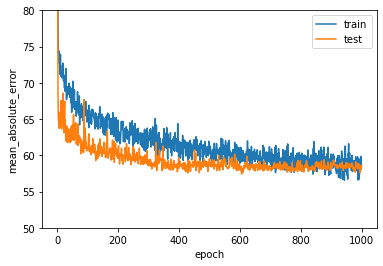

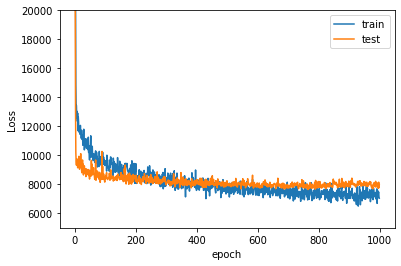

In [0]:
plot_nn_results(history)

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = split_and_scale(X, y2, poly_feats=False)

rf = RandomForestRegressor(n_estimators=100, random_state=883, n_jobs=-1, max_depth=None)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print('Train score:', rf.score(X_train, y_train), ' / ', mean_absolute_error(y_train, rf_train_pred))
print('Test score:', rf.score(X_test, y_test), ' / ', mean_absolute_error(y_test, rf_test_pred))

Number of features:  13
Train score: 0.965524470048045  /  21.383563648293965
Test score: 0.7151720048307524  /  57.15931627296589


### XGBoost regressor

In [0]:
# nech si skusaju ladit regularizaciu - cez max_depth a learning_rate
import xgboost as xgb

X_train, X_test, y_train, y_test = split_and_scale(X, y2, poly_feats=False)

# data_dmatrix = xgb.DMatrix(data=X,label=y2)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                          colsample_bytree=1, 
                          learning_rate=0.3, 
                          gamma=10, 
                          n_estimators=100,
                          max_depth=8)

xg_reg.fit(X_train, y_train)
y_test_pred = xg_reg.predict(X_test)
y_train_pred = xg_reg.predict(X_train)
print('Train score:', xg_reg.score(X_train, y_train), ' / ', mean_absolute_error(y_train, y_train_pred))
print('Test score:', xg_reg.score(X_test, y_test), ' / ', mean_absolute_error(y_test, y_test_pred))

Number of features:  13
Train score: 0.9985675521708861  /  4.803659134023771
Test score: 0.7595951376866428  /  51.092063858753114


## Split train/test on date - detecting data leakage

### Linear regression

In [0]:
for shuffle_par in [True, False]:
    print('SHUFFLE:', shuffle_par)
    for y in [y1, y2, y3]:
        X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=False, 
                                                           random_state=42, shuffle=shuffle_par)    
        fit_eval_regression_model(X_train, X_test, y_train, y_test, LinearRegression())
        print('------------------------')

SHUFFLE: True
Number of features:  13
Train score: 0.24646934663308837  /  223.62041893296413
Test score: 0.2640870758027337  /  220.77635465989826
Baseline MAE: 261.35553247773163
------------------------
Number of features:  13
Train score: 0.5008243865498594  /  86.78069779391053
Test score: 0.504725409489044  /  81.14593159031632
Baseline MAE: 116.52725706284748
------------------------
Number of features:  13
Train score: 0.16154529630459236  /  153.9683198415488
Test score: 0.11977853450380704  /  162.632679297511
Baseline MAE: 174.11693783109789
------------------------
SHUFFLE: False
Number of features:  13
Train score: 0.34819338488408236  /  226.55829929934555
Test score: -3.3369272049653347  /  324.97935301589945
Baseline MAE: 210.47118294514374
------------------------
Number of features:  13
Train score: 0.49266190607930255  /  87.84306217424906
Test score: 0.4632172387682426  /  88.86276326340386
Baseline MAE: 112.77169143227177
------------------------
Number of features

### Task 3a: Perform linear regression with polynomial features (degree 2) with shuffle=False for all 3 lines

In [0]:
for y in [y1, y2, y3]:
    X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=True, poly_degree=2, 
                                                       shuffle=True)
    fit_eval_regression_model(X_train, X_test, y_train, y_test, LinearRegression())
    print('------------------------')

Number of features:  104
Train score: 0.4112512811185709  /  200.74576041787128
Test score: 0.4085985824177186  /  200.38852938537832
Baseline MAE: 261.35553247773163
------------------------
Number of features:  104
Train score: 0.6734942343976336  /  68.72413160779183
Test score: 0.6350093068993643  /  67.21411459919254
Baseline MAE: 116.52725706284748
------------------------
Number of features:  104
Train score: 0.3028355295518572  /  140.820233738421
Test score: 0.20681204594768  /  154.15983576804405
Baseline MAE: 174.11693783109789
------------------------


### Task 3b: Perform linear regression with polynomial features (degree 3) with shuffle=False for all 3 lines

In [0]:
for y in [y1, y2, y3]:
    X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=True, poly_degree=3, shuffle=False)
    fit_eval_regression_model(X_train, X_test, y_train, y_test, LinearRegression())
    print('------------------------')

Number of features:  559
Train score: 0.820449328995778  /  119.40737273739602
Test score: -153.72560331613755  /  897.5347207365686
Baseline MAE: 210.47118294514374
------------------------
Number of features:  559
Train score: 0.8591088460024431  /  48.447497436599974
Test score: -5.60953626846333  /  245.06157037307472
Baseline MAE: 112.77169143227177
------------------------
Number of features:  559
Train score: 0.6687878554256992  /  98.56618730684511
Test score: -12.543794370604898  /  427.3124989526569
Baseline MAE: 149.2792242751152
------------------------


### Task 3c: Add regularization - do it for polynomial orders 1-5 and only for i630 line

In [0]:
from sklearn.linear_model import Ridge, Lasso

for poly_degree in [1, 2, 3, 4]:
    print('POLYNOMIAL DEGREE:', poly_degree)
    print('------------------------')
#     for y in [y1, y2, y3]:
    for y in [y2]:
        X_train, X_test, y_train, y_test = split_and_scale(X, y, poly_feats=True, 
                                                           poly_degree=poly_degree, 
                                                           shuffle=False)
        fit_eval_regression_model(X_train, X_test, y_train, y_test, Ridge(alpha=3e2))
        print('------------------------')

POLYNOMIAL DEGREE: 1
------------------------
Number of features:  13
Train score: 0.4789672895238831  /  86.22435538234409
Test score: 0.4764115174846238  /  88.00427908849703
Baseline MAE: 112.77169143227177
------------------------
POLYNOMIAL DEGREE: 2
------------------------
Number of features:  104
Train score: 0.6017389033242975  /  73.26280033582509
Test score: 0.5470510251938305  /  78.61282212971595
Baseline MAE: 112.77169143227177
------------------------
POLYNOMIAL DEGREE: 3
------------------------
Number of features:  559
Train score: 0.6463648565891149  /  68.93698865620787
Test score: 0.5741983999597229  /  78.33272503432457
Baseline MAE: 112.77169143227177
------------------------
POLYNOMIAL DEGREE: 4
------------------------
Number of features:  2379
Train score: 0.6909817727637146  /  65.29168563469852
Test score: 0.575003564598308  /  79.16499001528112
Baseline MAE: 112.77169143227177
------------------------


### Task 3d: Random Forest Regressor - the same as before, but shuffle=False

In [0]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = split_and_scale(X, y2, poly_feats=False, shuffle=False)

rf = RandomForestRegressor(n_estimators=300, 
                           random_state=883, 
                           n_jobs=-1, 
                           max_depth=6)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

print('Train score:', rf.score(X_train, y_train), ' / ', mean_absolute_error(y_train, rf_train_pred))
print('Test score:', rf.score(X_test, y_test), ' / ', mean_absolute_error(y_test, rf_test_pred))

Number of features:  13
Train score: 0.7971654101907364  /  56.97964180697862
Test score: 0.5953875964260971  /  75.13223519028132


### Task 3e: XGBoost regressor - the same as before, but shuffle=False. Also tune learning_rate and max_depth

In [0]:
# nech si skusaju ladit regularizaciu - cez max_depth a learning_rate
import xgboost as xgb

X_train, X_test, y_train, y_test = split_and_scale(X, y2, poly_feats=False, shuffle=False)

# data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                          colsample_bytree=1, 
                          learning_rate=0.019, 
                          gamma=10, 
                          n_estimators=100,
                          max_depth=6)

xg_reg.fit(X_train, y_train)
y_test_pred = xg_reg.predict(X_test)
y_train_pred = xg_reg.predict(X_train)
print('Train score:', xg_reg.score(X_train, y_train), ' / ', mean_absolute_error(y_train, y_train_pred))
print('Test score:', xg_reg.score(X_test, y_test), ' / ', mean_absolute_error(y_test, y_test_pred))

Number of features:  13
Train score: 0.7883742551893294  /  53.440625933149036
Test score: 0.6798452522225433  /  63.48660311561244


### Feature importance

In [0]:
sorted(zip(df.columns[:-3], xg_reg.feature_importances_), key=lambda x: -x[1])
# zaujimave, ze "O", ktore nema ziadnu korelaciu s y2, tak ma celkom vysoku feature importance!

[('SA', 0.22245057),
 ('R', 0.16537887),
 ('H', 0.12719795),
 ('F107', 0.12331671),
 ('O', 0.11560352),
 ('O2', 0.05331186),
 ('temperature', 0.053111974),
 ('apd', 0.027966168),
 ('AU', 0.027628709),
 ('N2', 0.027466478),
 ('Dst', 0.024916347),
 ('density', 0.017124768),
 ('Kp', 0.014525993)]

<IPython.core.display.Javascript object>


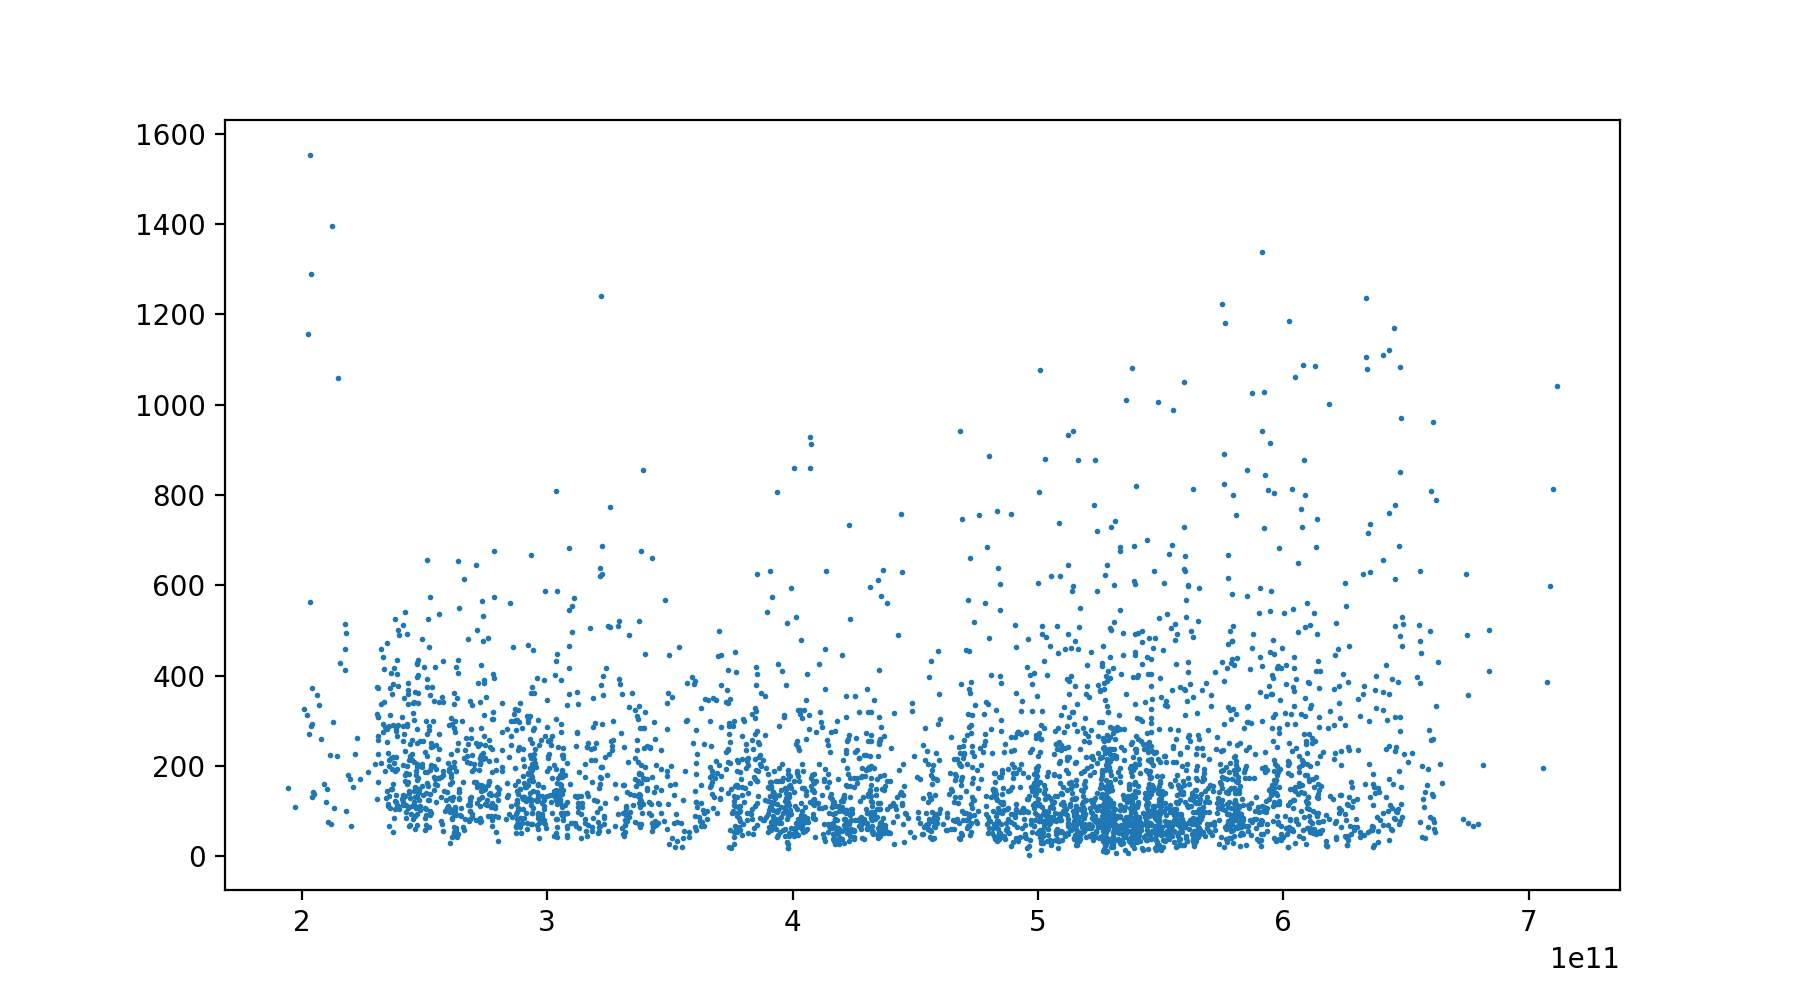

In [0]:
plt.figure()
plt.scatter(df['O'], df['i630'], s=1)
plt.show()

In [0]:
"""
skuste si este zvysne 2 ciary nafitovat, ked zvysi cas...
"""

## Time series forecasting

<IPython.core.display.Javascript object>


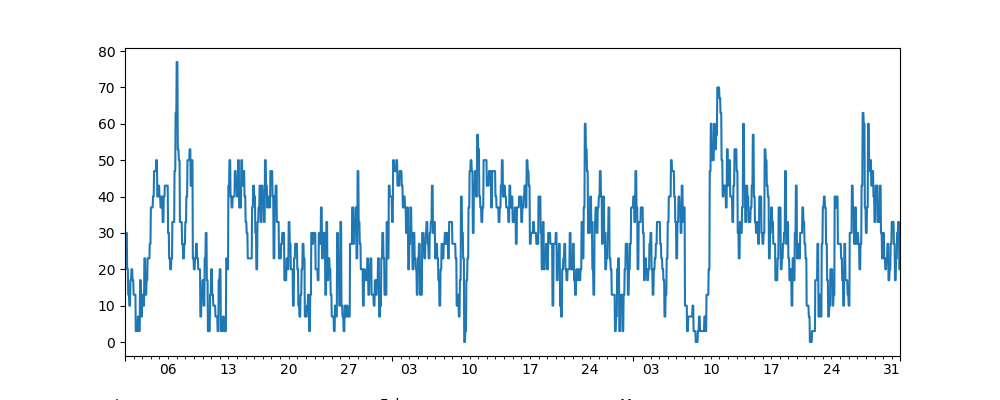

In [0]:
y = feats['Kp'].iloc[:2160]
plt.figure(figsize=(10, 4))
y.plot()
plt.show()

<IPython.core.display.Javascript object>


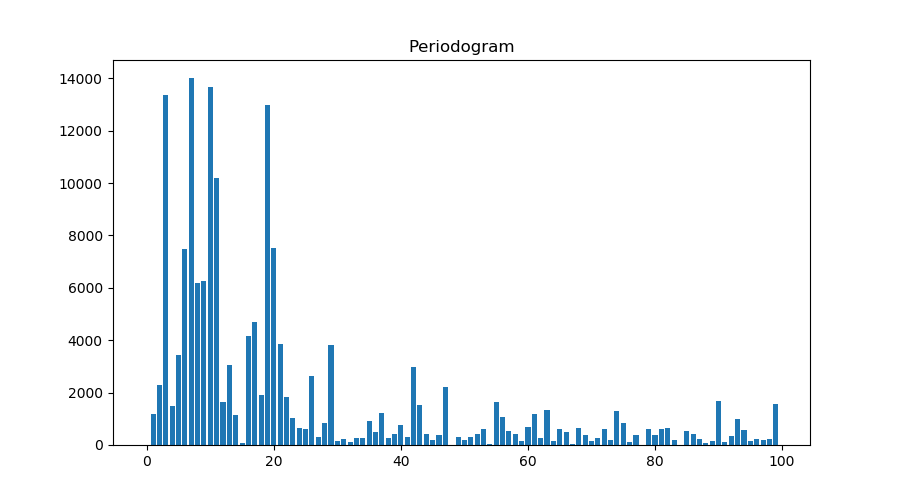

In [0]:
# check seasonality
from statsmodels.tsa.stattools import periodogram

plt.figure()
plt.bar(range(100), periodogram(y)[:100])
plt.title('Periodogram')
plt.show()

<IPython.core.display.Javascript object>


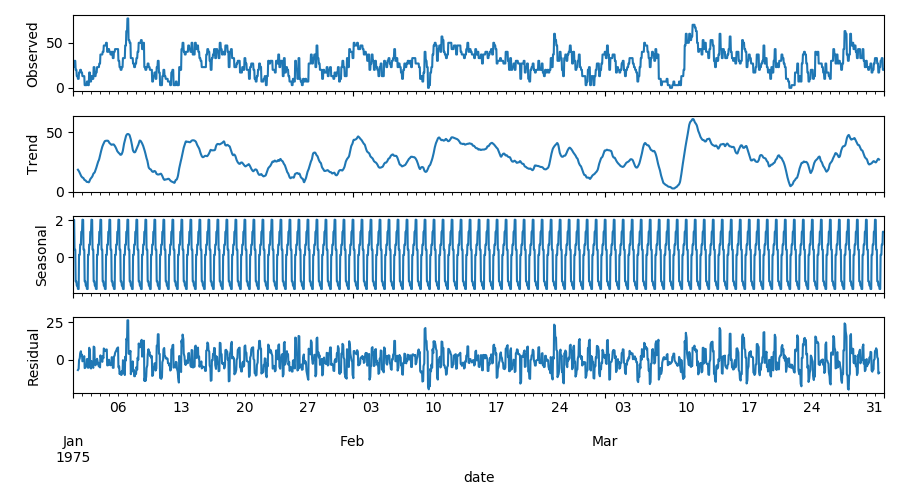

In [0]:
# check trends and seasonality
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

<IPython.core.display.Javascript object>


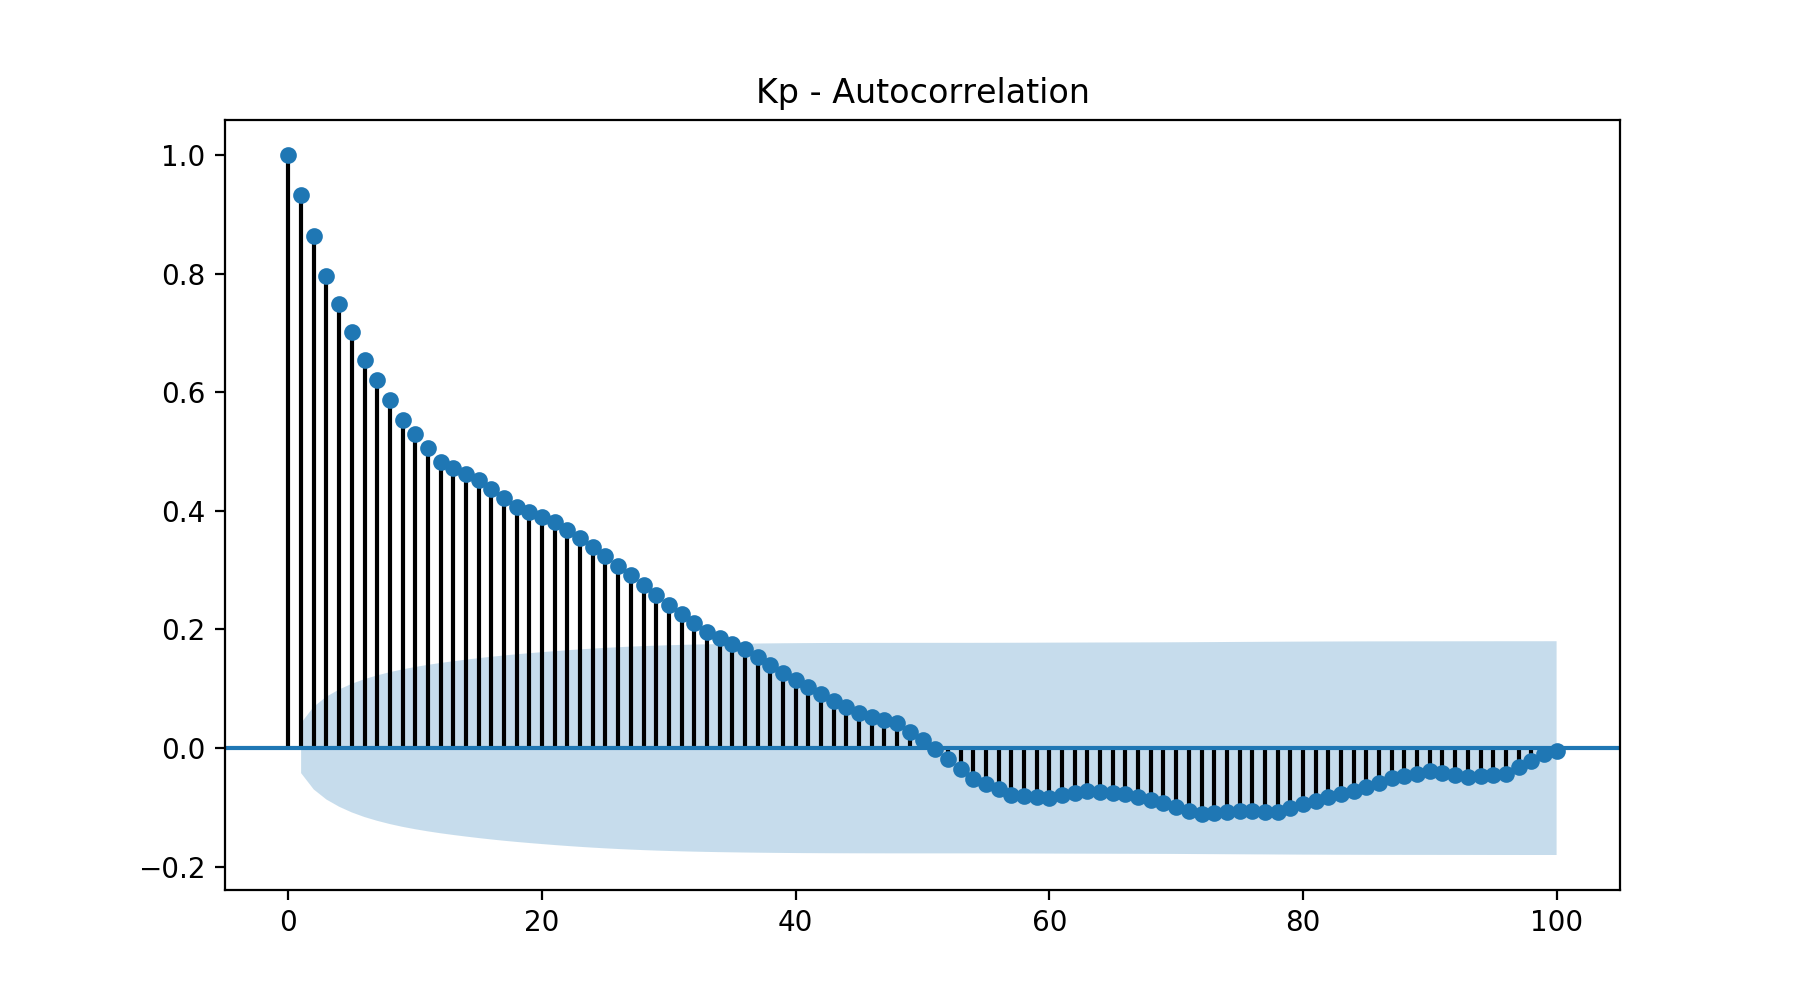

<IPython.core.display.Javascript object>


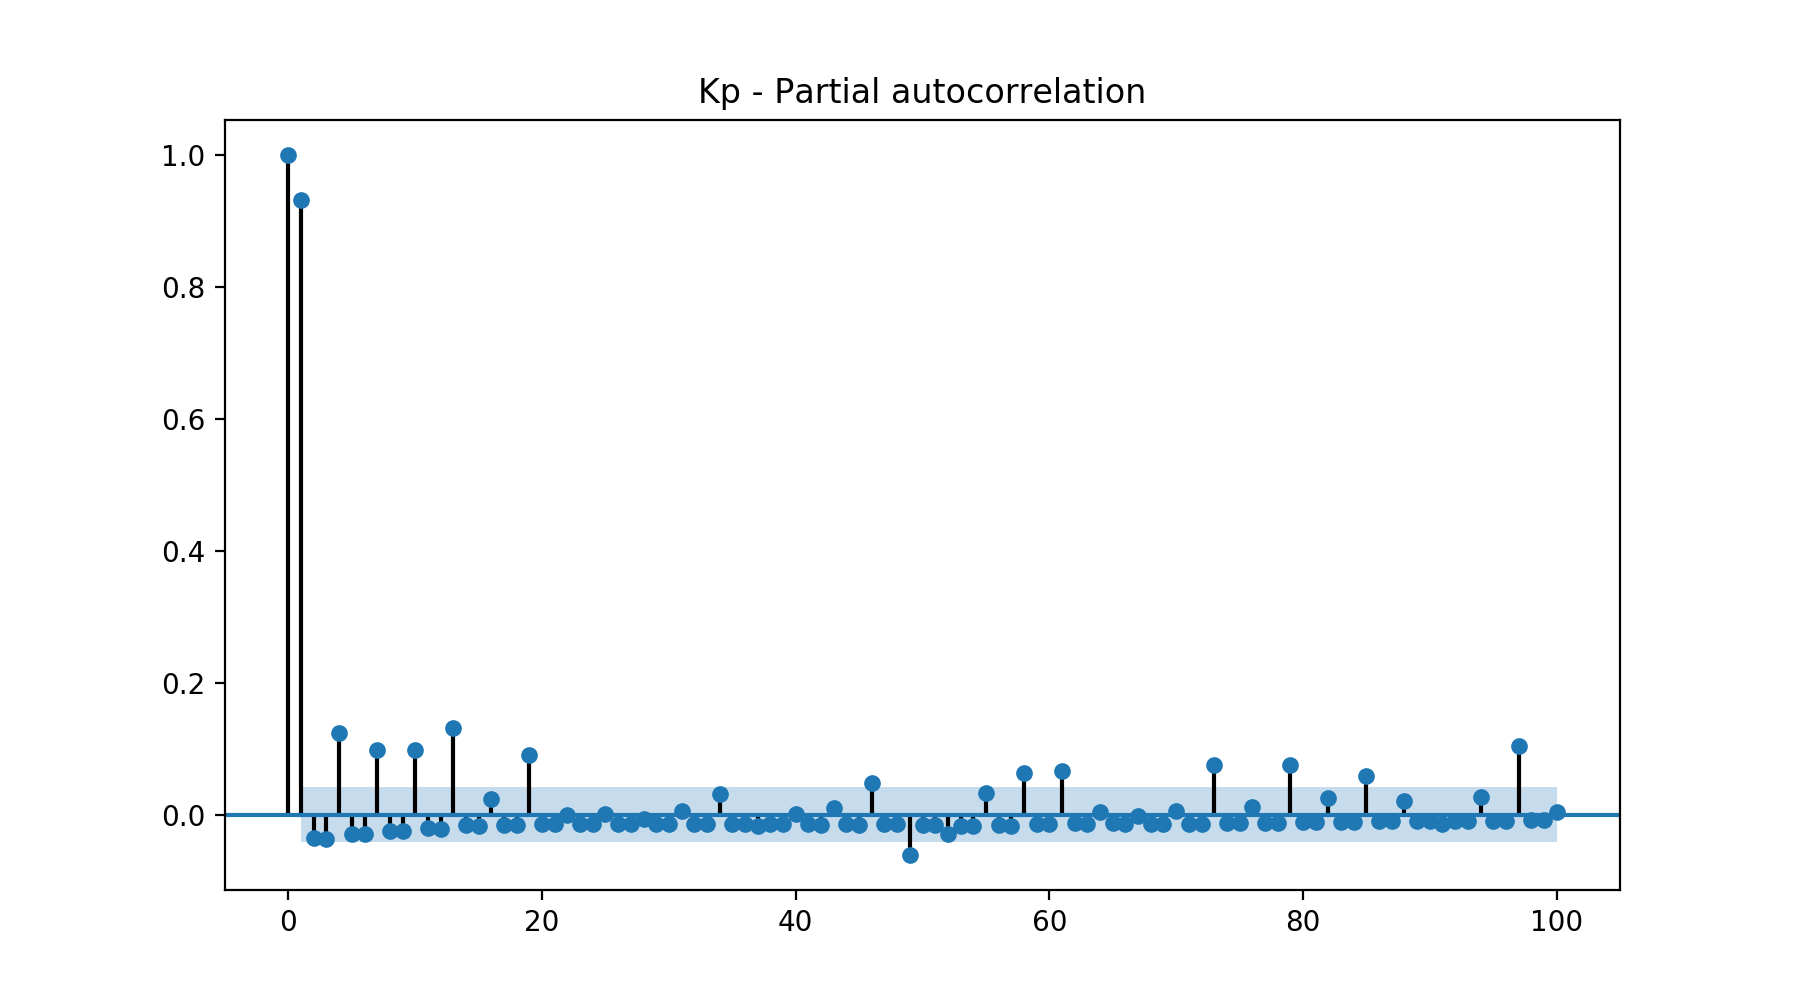

In [0]:
# determine lags from ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(y, lags=100)
plt.title('Kp - Autocorrelation')
plt.show()

plot_pacf(y, lags=100)
plt.title('Kp - Partial autocorrelation')
plt.show()

In [0]:
#train_test_split
tr_start,tr_end = y.index[0], y.index[int(0.9*len(y))]
te_start,te_end = y.index[int(0.9*len(y))], y.index[-1]
tra = y[tr_start:tr_end]
tes = y[te_start:te_end]

In [0]:
te_end - tr_end

Timedelta('8 days 23:00:00')

In [0]:
# test for stationarity of the series
res = sm.tsa.adfuller(y, regression='ct')
print('p-value:{}'.format(res[1]))

p-value:4.8485409308158616e-05


In [0]:
# fit model

arima = sm.tsa.statespace.SARIMAX(tra,
                                order=[4, 1, 4],
                                seasonal_order=[0, 0, 0, 0],
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
arima.aic

/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


11607.098967246005

### Task 4: Do the grid search over the parameters p, d, q. Find the set with best AIC.

In [0]:
# grid search over best parameters
from itertools import product

p = range(4, 10)
q = range(4, 10)
d = range(0, 2)

all_res = []
for params in product(p, d, q):
    
    mod = sm.tsa.statespace.SARIMAX(tra,
                                    order=params,
                                    seasonal_order=[0, 0, 0, 0],
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(params, results.aic))
    all_res.append((params, results.aic))

/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 1, 15) - AIC:11564.045015629727


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 1, 16) - AIC:11561.866343958125


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 1, 17) - AIC:11544.750004924288


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 1, 18) - AIC:11575.031561918295


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(15, 1, 19) - AIC:11572.443336351771


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 1, 15) - AIC:11567.315035107738


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 1, 16) - AIC:11564.120334146603


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 1, 17) - AIC:11547.170212843694


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 1, 18) - AIC:11575.077844603384


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(16, 1, 19) - AIC:11571.26530325921


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 15) - AIC:11563.719025811184


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 16) - AIC:11566.138789392897


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 17) - AIC:11549.225293354913


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 18) - AIC:11578.410669754396


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(17, 1, 19) - AIC:11570.538388657455


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 1, 15) - AIC:11561.658458495058


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 1, 16) - AIC:11563.976899398762


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 1, 17) - AIC:11583.921069139637


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 1, 18) - AIC:11589.685449193177


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(18, 1, 19) - AIC:11589.966728750891


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 15) - AIC:11559.653953843484


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 16) - AIC:11561.920934966327


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 17) - AIC:11580.55059508742


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 18) - AIC:11593.468029381667


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(19, 1, 19) - AIC:11591.808140324909


In [0]:
# use the best model
arima = sm.tsa.statespace.SARIMAX(tra,
                                order=[15, 1, 17],
                                seasonal_order=[0, 0, 0, 0],
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<IPython.core.display.Javascript object>


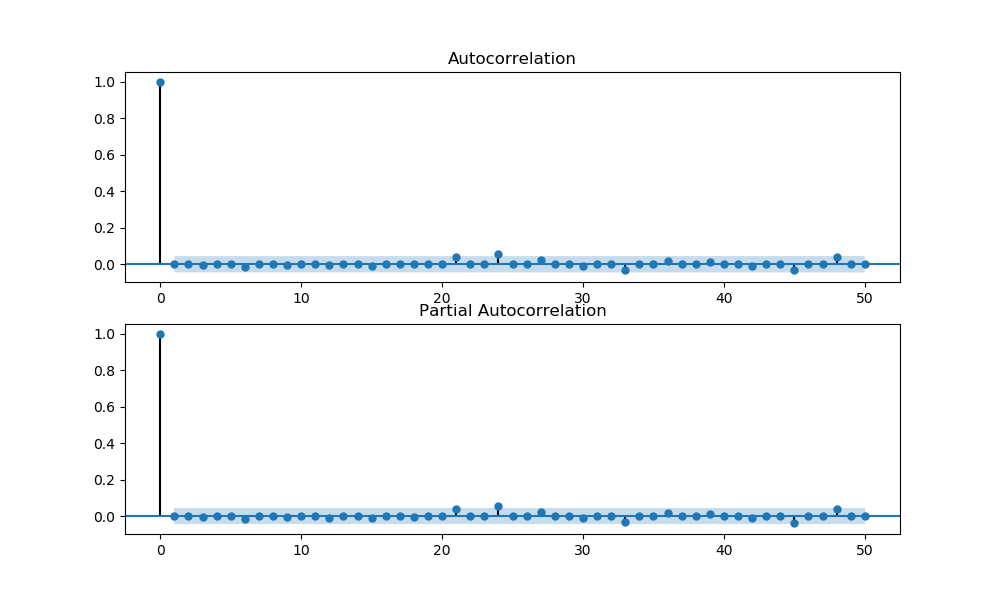

In [0]:
# look at residuals - is there any correlation still left?
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(10,6))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [0]:
# calculate prediction error
from sklearn.metrics import mean_squared_error
pred = arima.predict(tr_end, te_end)
print('ARIMA model MSE:{}'.format(mean_squared_error(tes, pred)))

ARIMA model MSE:146.34437014633198


/Users/Stano/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [0]:
# compare with baseline - disappointment!
print('BASELINE:', ((tes - np.mean(tra))**2).mean())

Baseline: 146.87861504131425


<IPython.core.display.Javascript object>


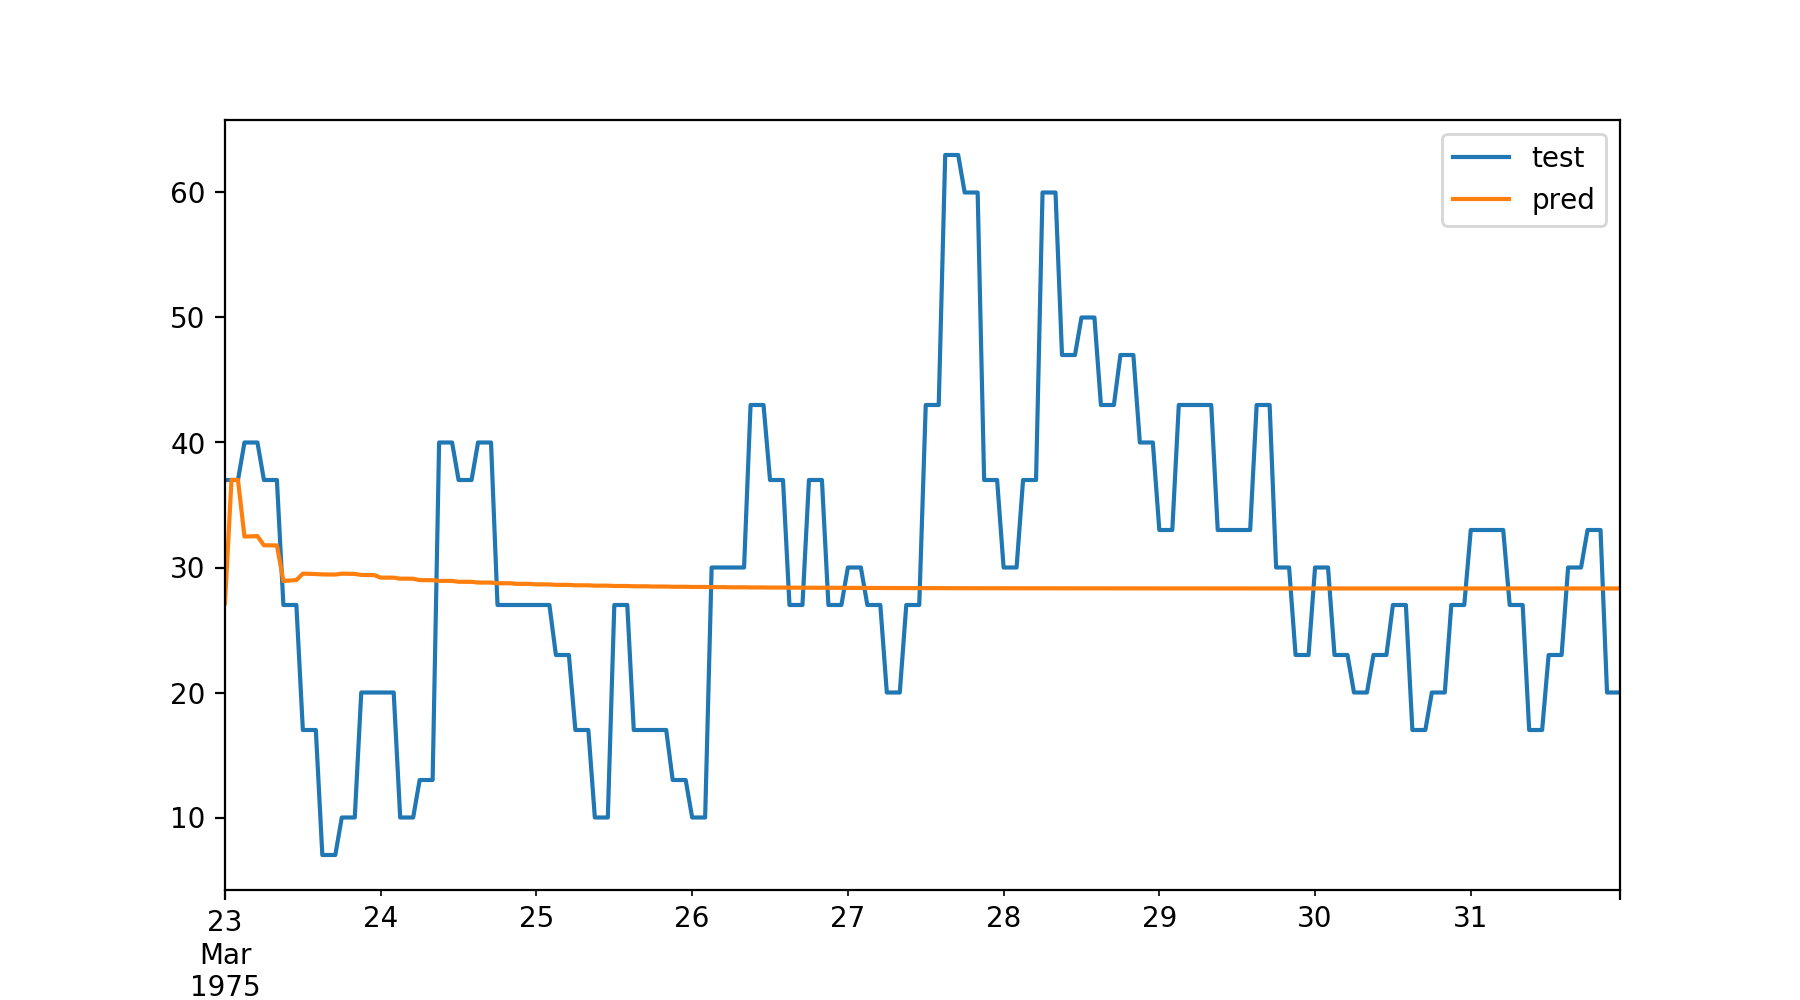

In [0]:
# wait a second, let's visualize it!
pd.DataFrame({'test':tes,'pred':pred}).plot()
plt.show()

In [0]:
# the prediction is actually pretty when not going that far to the future
print('ARIMA model MSE:{}'.format(mean_squared_error(tes[:8], pred[:8])))
print('Baseline1:', ((tes[:8] - np.mean(tra))**2).mean())
print('Baseline2:', ((tes[:8] - tra[-8:].mean())**2).mean())

ARIMA model MSE:40.08697059140526
Baseline1: 103.93900492991723
Baseline2: 367.875


In [0]:
"""
What we can add:
- seasonality
- check the convergence (warnings...)
- cross-validation
- exogenous parameters (other weather indices...)

Skuste este pre ine casove rady urobit tuto analyzu
"""